### Задание 5.
Требуется построить модель зависимости Y от X и прогноз на основе
данных в файле «Данные (задание 5).csv».

p/s/ файл «Данные (задание 5).csv» переименовала в datasets5.csv

In [26]:
#импорт библиотек
import operator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [2]:
#чтение датасета
data=pd.read_csv('datasets5.csv')
data=data.iloc[1:,:]
data

,x,y
1,0.025183,-10.149463
2,0.050366,-7.517911
3,0.075549,-5.480920
4,0.100732,-5.882184
5,0.125916,-3.672119
...,...,...
495,12.465638,7.887764
496,12.490821,7.991471
497,12.516004,8.313358
498,12.541188,9.128511


In [3]:
x = data.iloc[:, 0:1].values
y = data.iloc[:, 1:].values

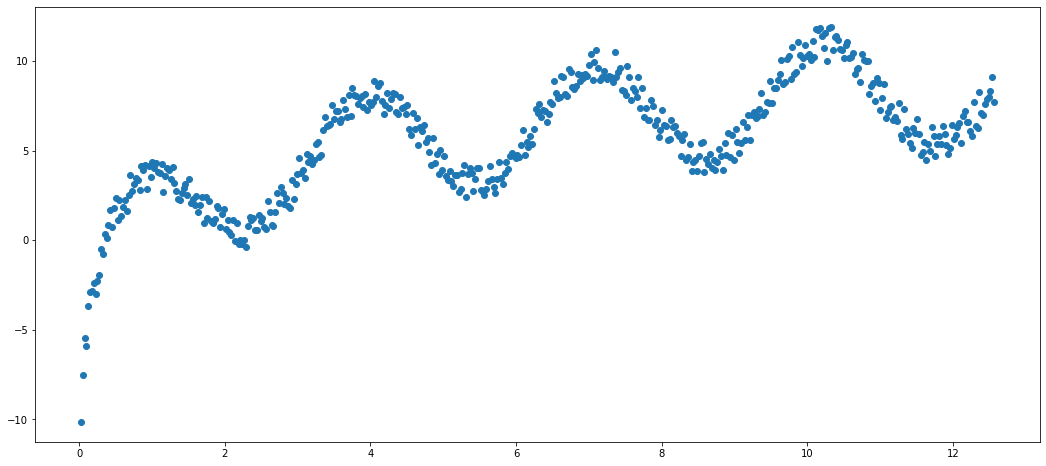

In [4]:
#визуализация данных
plt.figure(figsize=(18,8))
plt.scatter(data.x,data.y)
plt.show()

In [5]:
#функция для расчета метрик
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

Средняя абсолютная ошибка (MAE) - это среднее абсолютное значение ошибок.

Среднеквадратичная ошибка (MSE) - это среднее значение квадратов ошибок.

Среднеквадратичная ошибка (RMSE) - это квадратный корень из среднего квадрата ошибок.

Все это функции потерь, поэтому мы хотим их минимизировать.

### Polynomial Regression

In [6]:
#модель полиномиальной регресии
polynomial_features = PolynomialFeatures(degree=20)

x_poly = polynomial_features.fit_transform(x)


model = LinearRegression(normalize=True)
model.fit(x_poly,y)

y_poly = model.predict(x_poly)

#метрики
print('Set evaluation:\n_____________________________________')
print_evaluate(y, y_poly)


Set evaluation:
_____________________________________
MAE: 0.4762678024112833
MSE: 0.3114686715782839
RMSE: 0.5580937838556204
R2 Square 0.9701185532256684
__________________________________


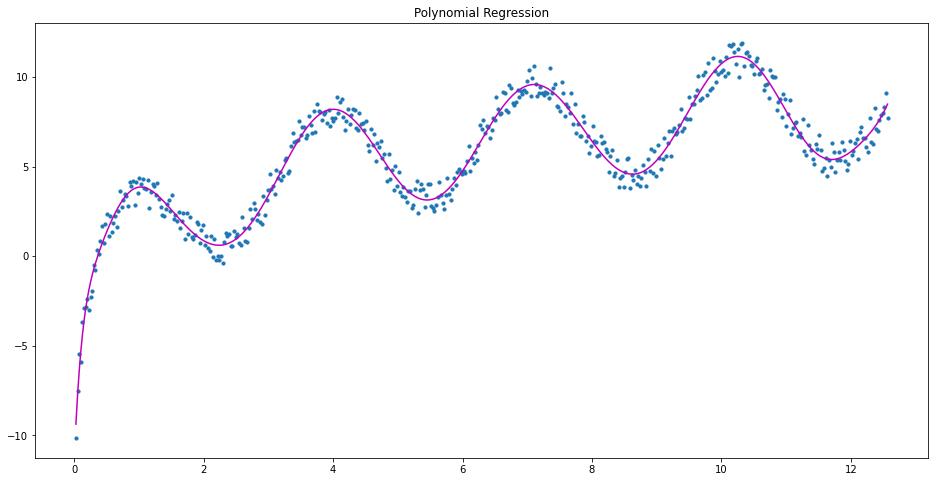

In [7]:
#визуализация
plt.figure(figsize = (16, 8))
plt.scatter(x, y, s=10)
plt.title('Polynomial Regression')
plt.plot(x, y_poly, color='m')
plt.show()

На этом этапе мы сравним и отобразим значения y как «Реальные значения» и y_poly как «Прогнозируемые значения»

In [8]:
model.df = pd.DataFrame({'x Values':x.reshape(-1),'y Real Values':y.reshape(-1), 'y Predicted Values':y_poly.reshape(-1)})
model.df

,x Values,y Real Values,y Predicted Values
0,0.025183,-10.149463,-9.374411
1,0.050366,-7.517911,-7.773295
2,0.075549,-5.480920,-6.437971
3,0.100732,-5.882184,-5.322483
4,0.125916,-3.672119,-4.387746
...,...,...,...
494,12.465638,7.887764,7.758615
495,12.490821,7.991471,7.922677
496,12.516004,8.313358,8.096505
497,12.541188,9.128511,8.284005


In [9]:
#запишем результаты метрик для анализа
results_df = pd.DataFrame(data=[["Polynomial Regression", *evaluate(y, y_poly)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

### RandomForestRegressor

In [10]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x, y)
y_pred = regressor.predict(x)

<ipython-input-10-6d3c7d88668c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x, y)


In [11]:
#метрики
print('Set evaluation:\n_____________________________________')
print_evaluate(y, y_pred)

Set evaluation:
_____________________________________
MAE: 0.21634488731204773
MSE: 0.07941955338326527
RMSE: 0.28181475011657087
R2 Square 0.9923807067168655
__________________________________


На этом этапе мы сравним и отобразим значения y как «Реальные значения» и y_pred как «Прогнозируемые значения»

In [12]:
df = pd.DataFrame({'x Values':x.reshape(-1), 'Real Values':y.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,x Values,Real Values,Predicted Values
0,0.025183,-10.149463,-9.359997
1,0.050366,-7.517911,-7.577367
2,0.075549,-5.480920,-5.724746
3,0.100732,-5.882184,-5.801931
4,0.125916,-3.672119,-3.432886
...,...,...,...
494,12.465638,7.887764,7.815866
495,12.490821,7.991471,7.895142
496,12.516004,8.313358,8.525715
497,12.541188,9.128511,8.904485


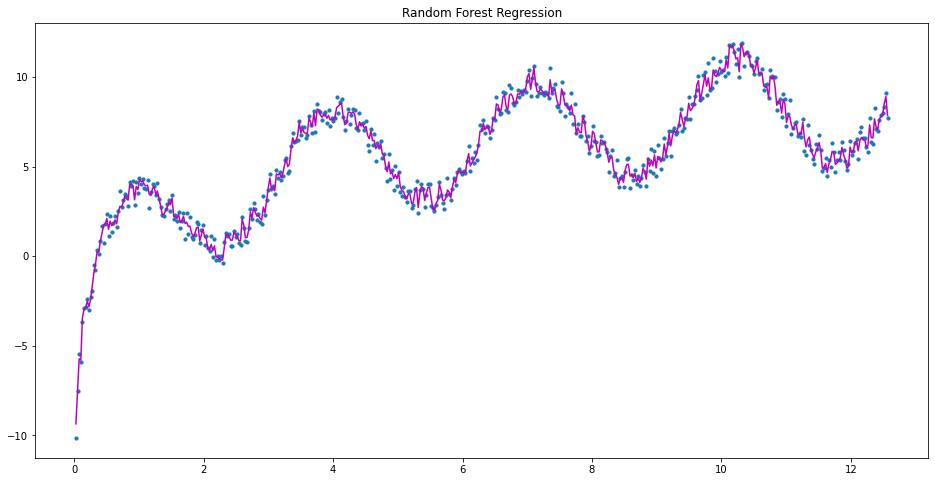

In [13]:
#визуализация
plt.figure(figsize = (16, 8))
plt.scatter(x, y, s=10)
plt.title('Random Forest Regression')
plt.plot(x, y_pred, color='m')
plt.show()

In [14]:
#запишем результаты метрик для анализа
results_df_2 = pd.DataFrame(data=[["Random Forest Regression", *evaluate(y, y_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)

### Support Vector Machine

In [15]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(x, y)

y_svm_reg = svm_reg.predict(x)


print('Set evaluation:\n_____________________________________')
print_evaluate(y, y_svm_reg)


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Set evaluation:
_____________________________________
MAE: 0.49424760193123163
MSE: 0.35304069298414936
RMSE: 0.5941722755095102
R2 Square 0.966130247953597
__________________________________


In [16]:
df = pd.DataFrame({'x Values':x.reshape(-1), 'Real Values':y.reshape(-1), 'Predicted Values':y_svm_reg.reshape(-1)})
df

,x Values,Real Values,Predicted Values
0,0.025183,-10.149463,-6.802726
1,0.050366,-7.517911,-6.214986
2,0.075549,-5.480920,-5.645194
3,0.100732,-5.882184,-5.093289
4,0.125916,-3.672119,-4.559205
...,...,...,...
494,12.465638,7.887764,7.778493
495,12.490821,7.991471,7.861505
496,12.516004,8.313358,7.934080
497,12.541188,9.128511,7.994949


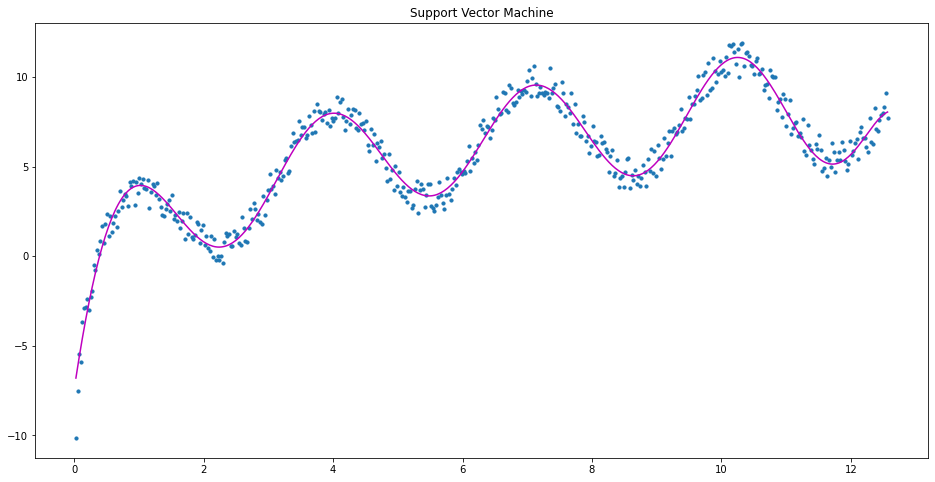

In [17]:
#визуализация
plt.figure(figsize = (16, 8))
plt.scatter(x, y, s=10)
plt.title('Support Vector Machine')
plt.plot(x, y_svm_reg, color='m')
plt.show()

In [18]:
#запишем результаты метрик для анализа
results_df_2 = pd.DataFrame(data=[["Support Vector Machine", *evaluate(y, y_svm_reg)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)

### Regression based on k-nearest neighbors

In [19]:
from sklearn.neighbors import KNeighborsRegressor
kn_reg = KNeighborsRegressor(n_neighbors=5)
kn_reg.fit(x, y)

y_kn_reg = kn_reg.predict(x)


print('Set evaluation:\n_____________________________________')
print_evaluate(y, y_kn_reg)


Set evaluation:
_____________________________________
MAE: 0.43415049569604075
MSE: 0.2913008751719103
RMSE: 0.5397229615014635
R2 Square 0.9720533960842419
__________________________________


In [20]:
df = pd.DataFrame({'x Values':x.reshape(-1), 'Real Values':y.reshape(-1), 'Predicted Values':y_kn_reg.reshape(-1)})
df

,x Values,Real Values,Predicted Values
0,0.025183,-10.149463,-6.540519
1,0.050366,-7.517911,-6.540519
2,0.075549,-5.480920,-6.540519
3,0.100732,-5.882184,-5.088079
4,0.125916,-3.672119,-4.154398
...,...,...,...
494,12.465638,7.887764,7.759741
495,12.490821,7.991471,8.186927
496,12.516004,8.313358,8.204901
497,12.541188,9.128511,8.204901


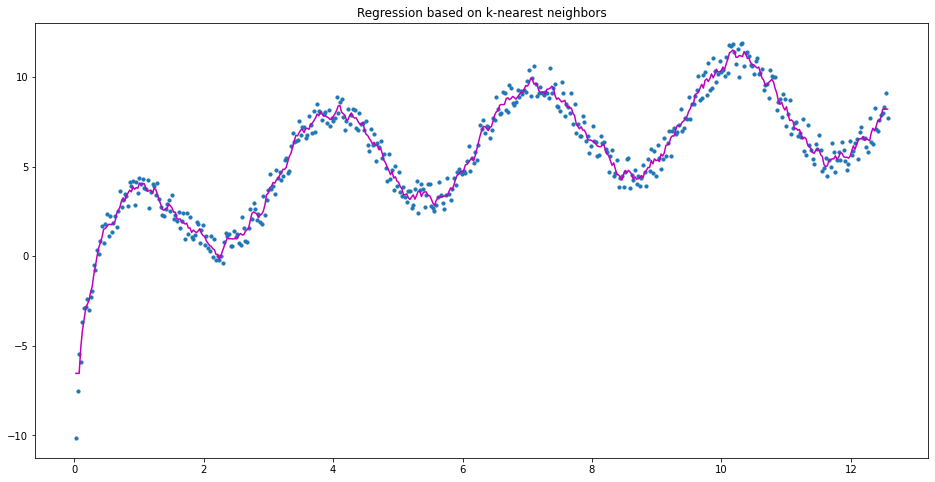

In [21]:
#визуализация
plt.figure(figsize = (16, 8))
plt.scatter(x, y, s=10)
plt.title('Regression based on k-nearest neighbors')
plt.plot(x, y_kn_reg, color='m')
plt.show()

In [22]:
results_df_2 = pd.DataFrame(data=[["Regression based on k-nearest neighbors", *evaluate(y, y_kn_reg)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)

## Результаты

In [23]:
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Polynomial Regression,0.476268,0.311469,0.558094,0.970119
1,Random Forest Regression,0.216345,0.079420,0.281815,0.992381
2,Support Vector Machine,0.494248,0.353041,0.594172,0.966130
3,Regression based on k-nearest neighbors,0.434150,0.291301,0.539723,0.972053


<AxesSubplot:ylabel='Model'>

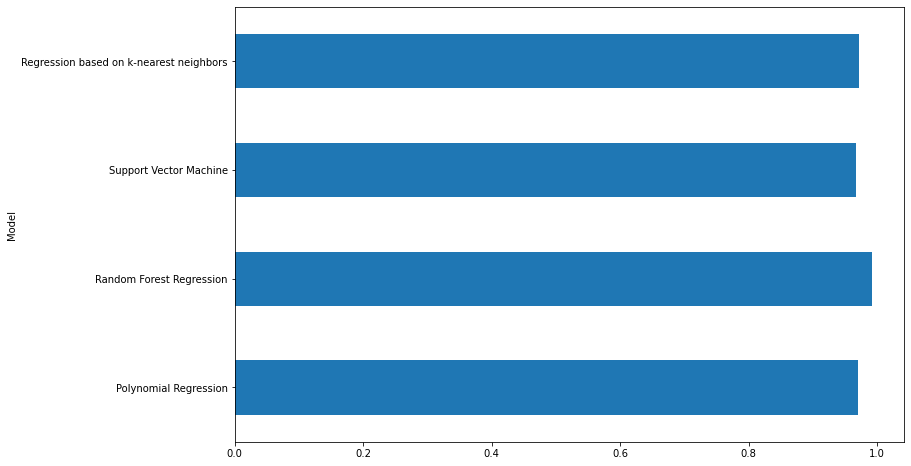

In [24]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

Лучший показатель R2 и низкие показатели метрик оценки регресси показала модель Random Forest Regression